![](../../intel_datalore_logo_wide.png)

Simple Linear Regression
===

In [9]:
# Setup
import numpy as np
np.set_printoptions(suppress=True) # for cleaner number printing

## Problem Definition

Let's consider a dataset of 50 houses which has the infomation about area and price of individual houses. Understanding the relation between these two variables, price and area,  can help the buyer to verify the price of the house or a builder to set the price of a new house based on existing houses data.

This kind of problem is solved using regression.

## Intuition

Let's see an example of Simple Linear Regression. Consider the following plot, which explains the variation of price of a house with respect to area of the house.

<img src="../img/image_1.png"/>

There are many observations of houses with different prices and areas. Regression can be thought of as drawing a line through the points, which best describes or fits them.

<img src="../img/image_2.png"/>

What qualifies the fitted line as **best fit**? This is discussed in the next section.

Regression is formulated as $y = mx + c$ and for this case, **Price** is the target variable and **Area** is Feature Variable, thus the equation can be expressed as **Price = $m$ * Area + $c$**. For now, let's assume the above is the best fit line.

Significance of **m** and **c**: 

* '**m**' explains the change in price per unit change in the area. So, if slope is more, change in price per unit change in area is more.

* '**c**' gives the price when the area is zero.

We had assumed that we got the best fit line. Now, let's understand how to get to that **best fit line** or how Simple Linear Regression can get that best fit line for us.


### Error Minimization 

Let's observe the following chart which explains both the actual values of prices from the collected data and the predicted values of prices by Linear Regression.

<img src="../img/image_3.png"/>

Values plotted in the graph are actual prices and in order to get the predicted prices, we may just use the regression line (in red colour) for the same value of area. It is clearly evident that, there are some mismatach in predicted and actual values for all the obsevation points.  Considering a specific example of `1600` square feet, actual price is `8074000` rupees, but our model predicts it to be around `9200000` rupees. This difference between actual and predicted value of output is called **error**, which in this case is around Rs. `1126000`.

**Error = Actual value - Predicted value**.

The following plot describes the notion of error. The length of the vertical line joining a data point and regression line depicts the magnitude of the error in the model's prediction and the data point. Even though most of the points are not exactly predicted, the regression line has a minimum possible overall error.

<img src="../img/error.png"/>

The best fit line has the minimum Sum of the Squared Errors $(SSE)$ for all the observations. We will visit $SSE$ in the later sections to understand the fitness of the line.

Linear Regression model starts with a random line and then slowly moves the line towards training set of points.
Moving of line towards data points is eqvivalent to minimizing the overall error. When an ideal line if found the algorithm terminates. The line which has minimum overall error is the **best fit line** and the method is called **ordinary least square method**.

__Illustration: Learning of Linear Regression__

## Simple Linear Regression in Scikit-Learn

To begin with, all necessary libraries are imported.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
%matplotlib inline
plt.style.use("seaborn-poster") # make bigger plots!

C:\Users\sksag\AppData\Local\Temp\ipykernel_13304\342670765.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-poster") # make bigger plots!


Now, lets load the dataset to variable **df** (short for dataframe).

Let's load the data using pandas.

In [11]:
df = pd.read_csv('housing_prices_SLR.csv') 
df


,AREA,PRICE
0,1000,5617528.34
1,1030,5201397.67
2,1060,4778957.34
3,1090,5424564.78
4,1120,5657235.90
5,1150,4944801.22
6,1180,6474952.94
7,1210,5351641.54
8,1240,6289541.05
9,1270,6147374.49


In [12]:
df.PRICE= np.round(df.PRICE/1000)

A view of the dataset

In [13]:
print(df.head(10))

   AREA   PRICE
0  1000  5618.0
1  1030  5201.0
2  1060  4779.0
3  1090  5425.0
4  1120  5657.0
5  1150  4945.0
6  1180  6475.0
7  1210  5352.0
8  1240  6290.0
9  1270  6147.0


Data type of feature and target, df is data frame

In [14]:
print("Shape of df: ", df.shape)
print("\nData types :")
print(df.dtypes)

Shape of df:  (50, 2)

Data types :
AREA       int64
PRICE    float64
dtype: object


So, the dataset has the information of prices of `50` different houses, with respect to their area. Now, let's define "Feature Matrix" and "Target Variable Vector", and name them `x` and `y` respectively. In this case, 'Area' is the Feature $(x)$ and 'Price' is the Target $(y)$.

So, let's define them properly using pandas.
[[]]]: will give us only one column and will retain the two dimentions of array
however the target could be one dimention also []

In [15]:
x = df[["AREA"]].values
print("Shape of x", x.shape)
print("First 10 rows of x:\n", x[:10])

Shape of x (50, 1)
First 10 rows of x:
 [[1000]
 [1030]
 [1060]
 [1090]
 [1120]
 [1150]
 [1180]
 [1210]
 [1240]
 [1270]]


In [16]:
y = df["PRICE"].values
print("Shape of y", y.shape)
print("First 10 values of y:\n", y[:10])

Shape of y (50,)
First 10 values of y:
 [5618. 5201. 4779. 5425. 5657. 4945. 6475. 5352. 6290. 6147.]


NOTE: `x` is always a 2-dimensional Matrix 

### Break Data Up Into Training And Test Datasets

Now for the real work. To judge how how good our model is, we need something to test it against. We can accomplish this using a technique called cross-validation. Cross-validation can get much more complicated and powerful, but in this example we are going do the most simple version of this technique.

---

**Steps**

1. Divide the dataset into two datasets: A 'training' dataset that we will use to train our model and a 'test' dataset that we will use to judge the accuracy of that model.
2. Train the model on the 'training' data.
3. Apply that model to the test data's $x$ variable, creating the model's guesses for the test data's $y$.
4. Compare how close the model's predictions for the test data's $y$ were to the actual test data $y$.

source: [Chris Albon](https://chrisalbon.com/machine-learning/linear_regression_scikit-learn.html)

---

Now, $x$ and $y$ are ready. To split our data in to  'training set' and 'test set', we can use `sklearn.model_selection` module's `train_test_split` function.

For more details on `train_test_split`, please see [sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

So, let's split our dataset.

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 42)

In the above line of code, we split our data in to `4` variables namely, `x_train`, `x_test`, `y_train` and `y_test`. We are asking `train_test_split` function to split `x` and `y` into random *train* and *test* subsets. By setting `random_state` to `42`, we are directing `train_test_split` to provide us with the same split every time it is called.

Now, let's check the `4` variables created by `train_test_split`.
it will randomly split the data to tarining and testing. however we can specify the testr size

In [18]:
print("Train: \n", x_train.shape, y_train.shape)
print("Test: \n", x_test.shape, y_test.shape)

Train: 
 (33, 1) (33,)
Test: 
 (17, 1) (17,)


In [19]:
print("Train:")
print("-"*45)
print("x_train:\n", x_train[:5])
print("\ny_train:\n",y_train[:5])
print("-"*45)

Train:
---------------------------------------------
x_train:
 [[2380]
 [2410]
 [1450]
 [1270]
 [1480]]

y_train:
 [17604. 17310.  7535.  6147.  9968.]
---------------------------------------------


In [20]:
print("Test:")
print("-"*45, "\n")
print("x_test:\n", x_test[:5])
print("\ny_test:\n",y_test[:5])
print("-"*45, "\n")

Test:
--------------------------------------------- 

x_test:
 [[1390]
 [2170]
 [1900]
 [2350]
 [1510]]

y_test:
 [ 9457. 15457.  9912. 16845.  7614.]
--------------------------------------------- 



We have all the necessary components to build a linear regression model. To do this, `LinearRegression` class from `sklearn.linear_model` module to fit our regressor. Let's fit the linear regression model on our training data.

In [21]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

Now that the model has learnt on training set, let's predict on test set. We can generate predictions `y_pred` on `x_test` using `predict` method.  With `y_pred` and `y_true`, we can evaluate our model's performance by camparision.

In [22]:
y_pred = regressor.predict(x_test)

y_pred

array([ 7668.59228444, 14526.23888278, 12152.4381372 , 16108.77271317,
        8723.61483803, 16900.03962836, 11097.41558361, 10833.65994521,
       12679.949414  ,  9251.12611482,  7404.83664604,  5294.79153886,
       13998.72760599,  6349.81409245,  5031.03590046,  5822.30281565,
       15053.75015958])

Above is the set of $y$ values predicted by the model for `x_test` input. We can compare the predicted values with the actual $y$ values by checking it as well.

In [23]:
y_test

array([ 9457., 15457.,  9912., 16845.,  7614., 14036.,  9288.,  8314.,
        9085., 10067.,  8712.,  5657., 12574.,  6290.,  5425.,  6475.,
       12641.])

It's uneasy to compare `y_pred` and `y_test` by comparing each values. One way of comparing them is by vizualization. So, let's visualize the dataset and the model to get a better insight. To begin with, let's visualize the training set as scatter plot.

`plt.scatter` can be used to get a scatter plot. Now, it's time to visualize the Linear Regression model and understand its prediction.

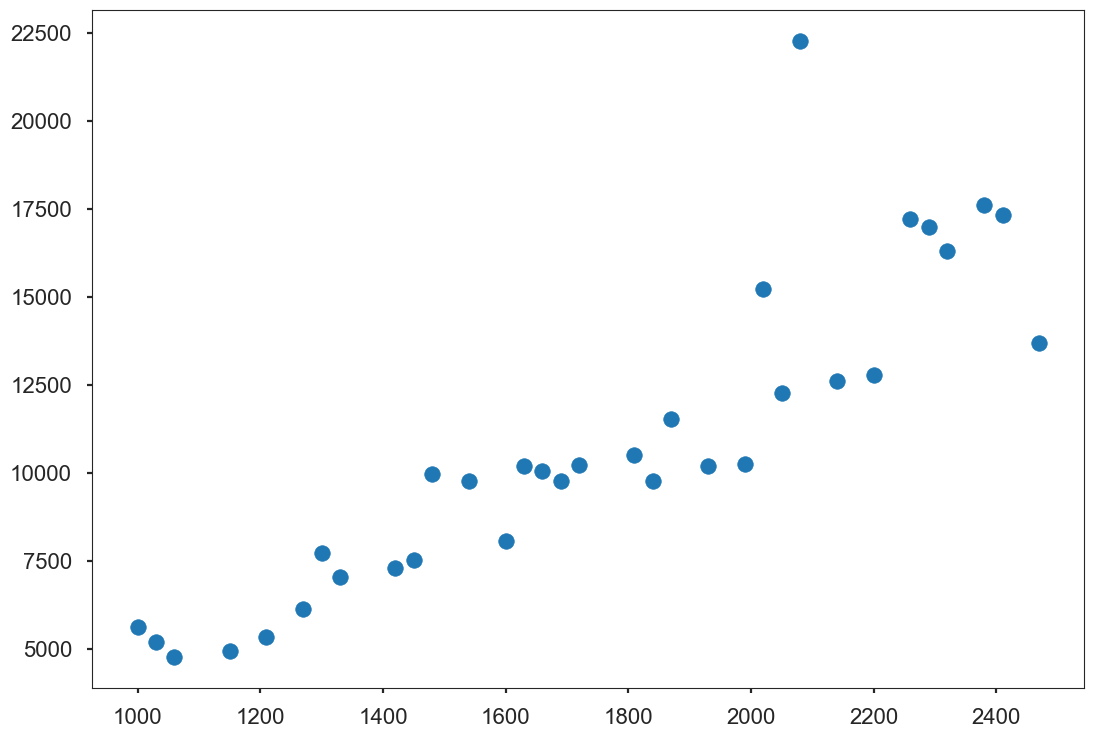

In [24]:
plt.scatter(x_train, y_train)

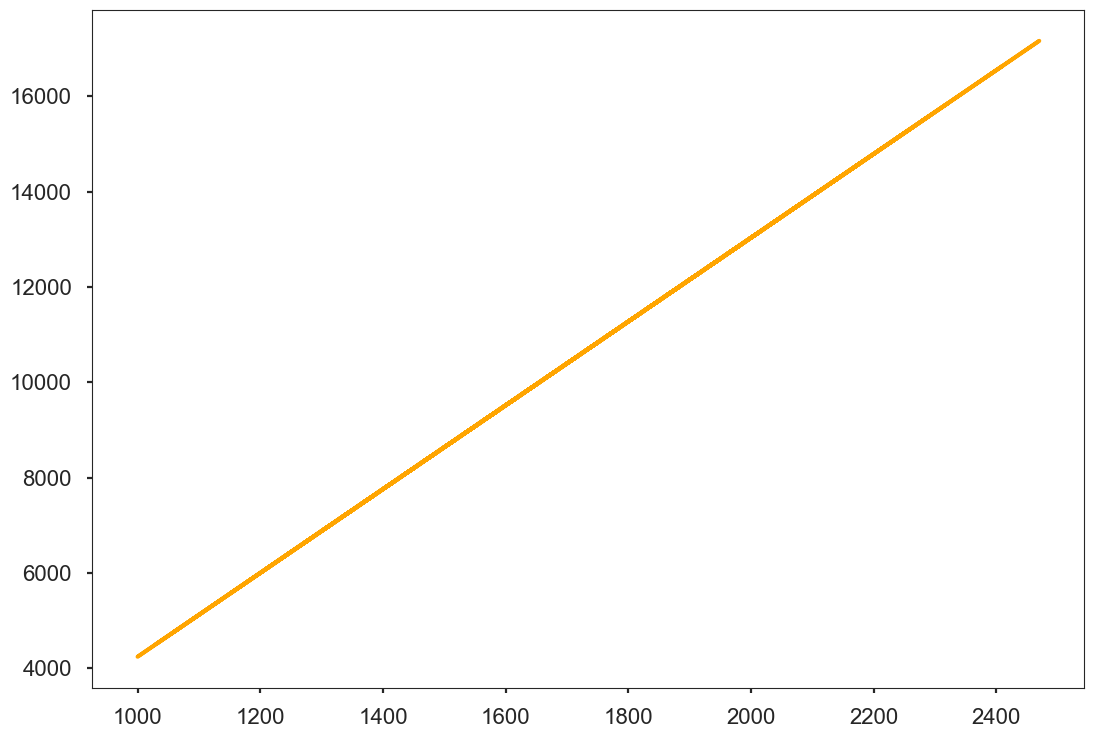

In [25]:
plt.plot(x_train, regressor.predict(x_train), color = 'orange')

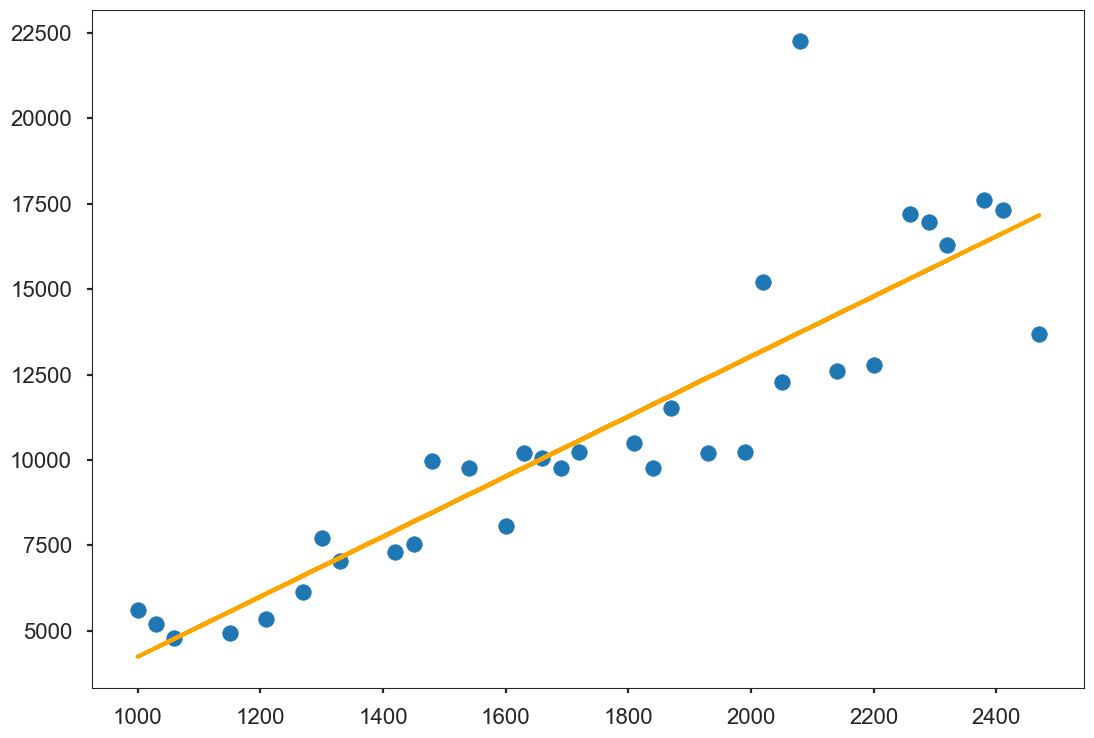

In [26]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regressor.predict(x_train), color = 'orange')

Now, comparison is much clear and model looks as a good representation of the data pattern.  Let's redraw the plot with proper annotations.


Text(0.5, 1.0, 'House Area vs House Price (Train)')

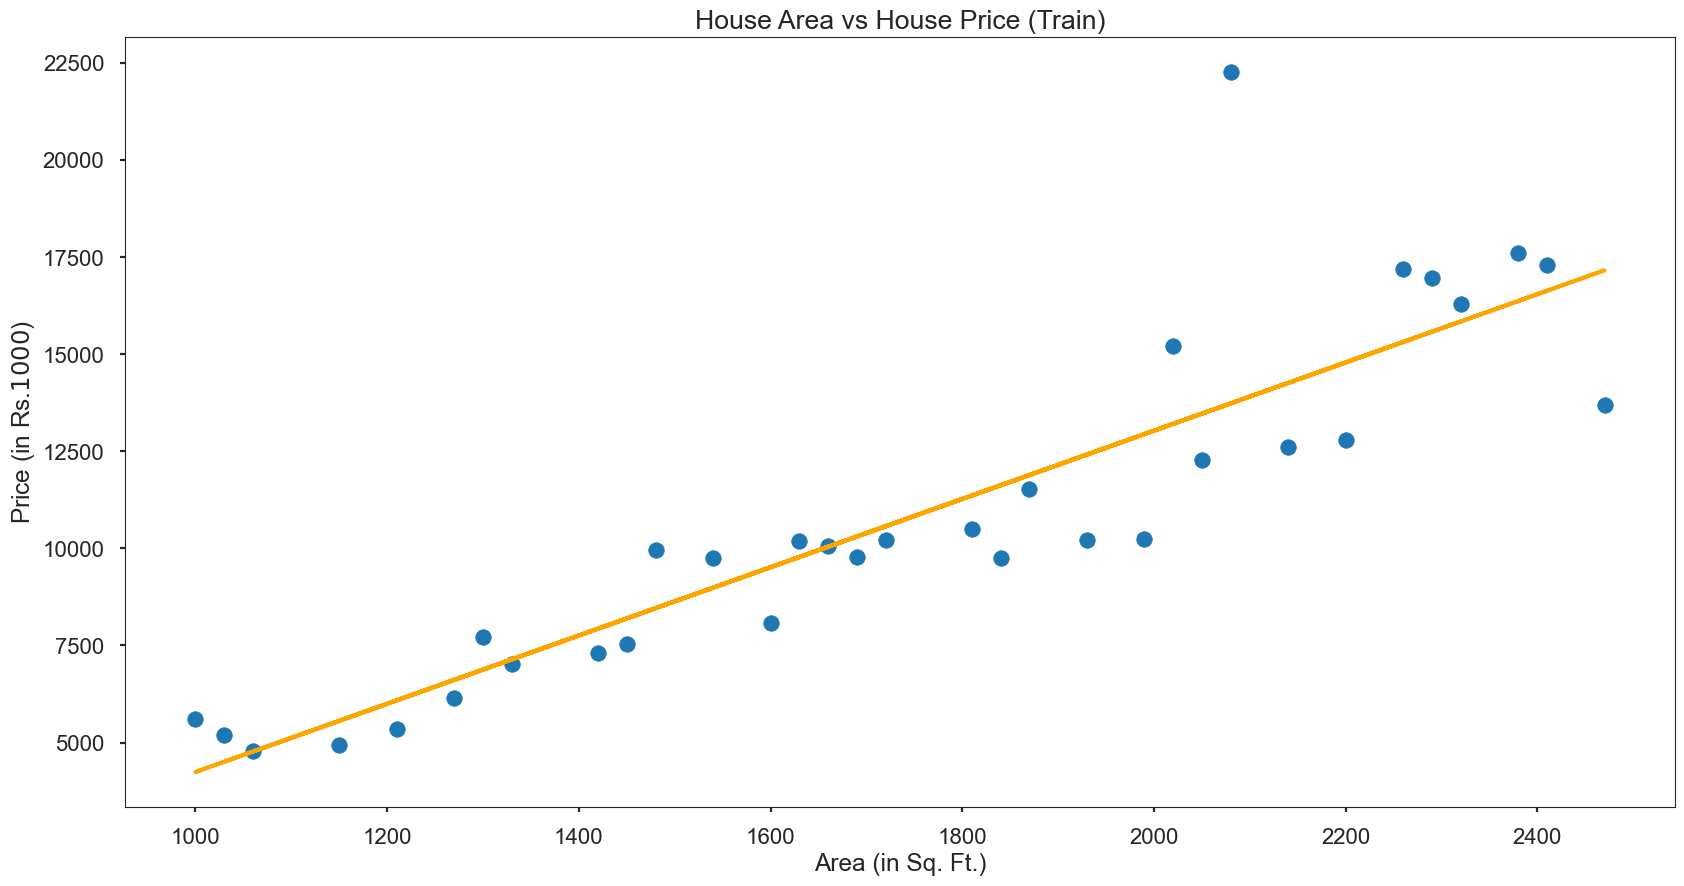

In [27]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.scatter(x_train, y_train, antialiased=True)
ax.plot(x_train, regressor.predict(x_train), color = 'orange')
ax.set_xlabel("Area (in Sq. Ft.)")
ax.set_ylabel("Price (in Rs.$1000$)")
ax.set_title("House Area vs House Price (Train)")

Above plot clearly helps us to visualize how good is our model's prediction with respect to training set. With this, we can now visualize how good is the model fits to new inputs as well. Let's use test set, `x_test` as data for scatter plot and also plot regression line.

Text(0.5, 1.0, 'House Area vs House Price (Test)')

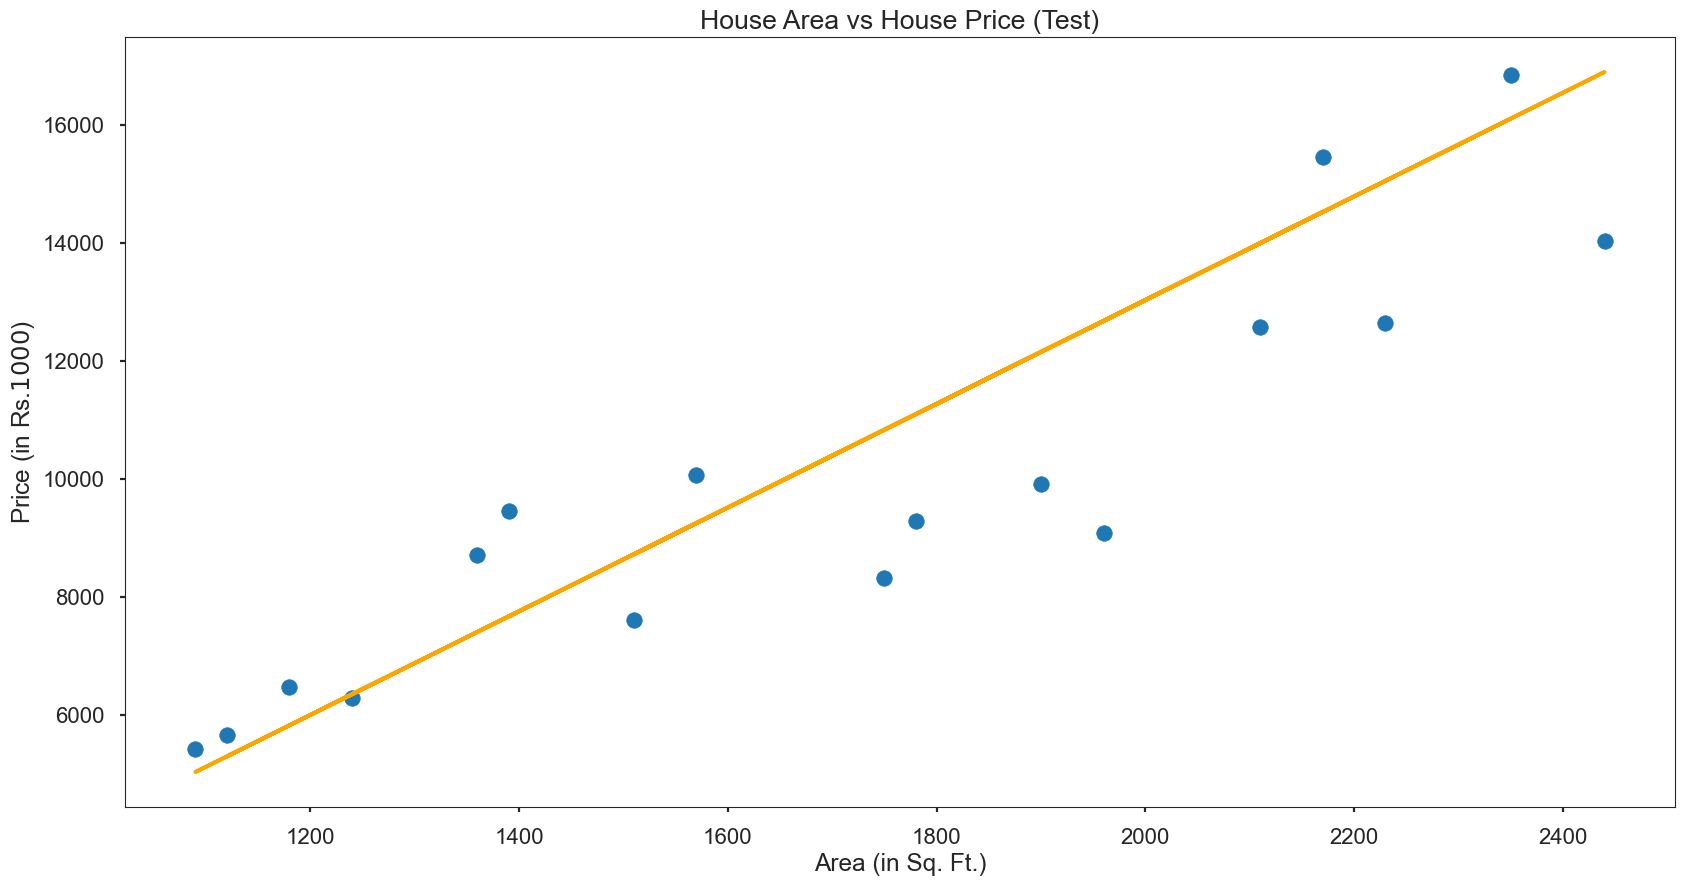

In [28]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.scatter(x_test, y_test, antialiased=True)
ax.plot(x_test, regressor.predict(x_test), color = 'orange')
ax.set_xlabel("Area (in Sq. Ft.)")
ax.set_ylabel("Price (in Rs.$1000$)")
ax.set_title("House Area vs House Price (Test)")

It's evident that, the model is doing a very decent prediction, as the actual $y$ values (`y_test`) and the predicted $y$ values are in good agreement. But, just eye balling the regression line can not be a valid metric to assess the model. Therefore, we introduce $R^2$ score 

## Model Evaluation

Going back to the concept of error in the Simple Linear Regression, consider the following observation.

<img src ="../img/model_evaluation1.png"/>

For the above set of observations, Simple Linear Regression is consturcted using 'Ordinary Least Squares' method, minimizing the sum of the squares of the difference between the actual value ($y_i$) and the predicted value ($\hat{y_i}$).

The value with minimum value for the sum of the square of errors will be the best fitting line or simple linear regression model. This is also called as **Sum of squared errors** or **Sum of Squres of residual Errors** ($SSE_{res}$). 

Note: The error is also called residuals.

$$SSE_{res} = \sum(y_i - \hat{y_i})^2$$



### Baseline Model

To define a metric for our model's performance we need to define a baseline model to compare our model with. The baseline model is a model which always predicts average value of the target in case of regression. This is due to the fact that most of the values of target are around its mean. Let's calculate the average value of target.

Now, let's replace the regression line by average line and project the observation on average line as shown below,

<img src ="../img/model_evaluation2.png"/>


If the error is caluclated with respect to the average line, then squared and sum for all the observations is taken, it is called **Total sum of squares** ($SSE_{tot}$). It is also denoted by $TSS$

$$ TSS = \sum(y_i - y_{avg})^2$$ 



In [29]:
baseline_pred = np.round(y_train.mean(), 2)
print("Baseline prediction: ", baseline_pred)

Baseline prediction:  10793.7


No matter what the area of the house is, we always predict the price of the house to be `10793.7`

In [30]:
differnces = y_train - baseline_pred
print("Errors: \n", differnces)
squared_differnces = differnces**2
print("\nSquared Errors:\n", squared_differnces)
sse = squared_differnces.sum()
print("\nSum of Squared Errors for Baseline model: ", sse)

Errors: 
 [ 6810.3  6516.3 -3258.7 -4646.7  -825.7  -564.7  4426.3  -589.7 -5175.7
  5499.3  -290.7  -553.7 -5848.7   733.3 -3758.7 11476.3 -5592.7  -592.7
 -6014.7  6175.3  1484.3 -1018.7  1999.3 -3075.7  -742.7 -1031.7  2905.3
 -2719.7 -5441.7  6413.3 -3489.7 -1030.7  1824.3]

Squared Errors:
 [4.63801861e+07 4.24621657e+07 1.06191257e+07 2.15918209e+07
 6.81780490e+05 3.18886090e+05 1.95921317e+07 3.47746090e+05
 2.67878705e+07 3.02423005e+07 8.45064900e+04 3.06583690e+05
 3.42072917e+07 5.37728890e+05 1.41278257e+07 1.31705462e+08
 3.12782933e+07 3.51293290e+05 3.61766161e+07 3.81343301e+07
 2.20314649e+06 1.03774969e+06 3.99720049e+06 9.45993049e+06
 5.51603290e+05 1.06440489e+06 8.44076809e+06 7.39676809e+06
 2.96120989e+07 4.11304169e+07 1.21780061e+07 1.06234249e+06
 3.32807049e+06]

Sum of Squared Errors for Baseline model:  607396450.97


Lets define a function which calculates __SSE__.

In [31]:
def sse(y_true, y_pred):
    return ((y_true-y_pred)**2).sum()

Let's calculate __SSE__ for our regression model. 

In [32]:
y_train_pred = regressor.predict(x_train)

In [33]:
sse_train = sse(y_train, y_train_pred)
print("Regression Model SSE", sse_train)

Regression Model SSE 131819322.75993812


As you can see our model does better than baseline model. We can not do worse than our basline model on training set. 

__Problems with SSE as model evaluation metric__: 

A $SSE$ value closer to 0 indicates that the model has a smaller error component, and that the fit will be more useful for prediction. However there is no upper bound for $SSE$. Naturally, with more data points, $SSE$ is bound to increase irrespective of goodness of fit. That is, for the same model if you increase the number of observations to calculate $SSE$, the $SSE$ higher than the previous $SSE$ (with fewer observations). This is not an robust metric to evaluate a model. We have to define a new metric to evaluate based on baseline model which is more interpretable than $SSE$.

### $R^2$ Score


We define $R^2$ for a model as, 

$$R^2 = 1 - \frac{SSE}{TSS}$$

Average line is also a linear regression model with zero slope (horizontal). But it is always easy to get that line straight away by taking the average of all the data points. But it is evident that it is not a good fit, as it is not representing the data well. So, a sloped line is fit to the model which minimizes the value of $SSE_{res}$ and to get a best fit line.

So, $R^2$ speaks about how good is the regression line in comparison with the average line.

In the equation of $R^2$, when $SSE_{res}$ value reduces, the fraction value reduces and the value of $R^2$ will be greater. In an ideal case where $SSE_{res}$ value is $0$, the model predicts every observation perfectly and value of $R^2$ will be $1$.

$R^2$ value ranges from 0 and 1. Closer the $R^2$ value to one, better the fit.




Some of the important properties of $R^2$ are:

* $R^2$ for the basline model is $0$
* $R^2$ for a perfect model is $1$
* Higher the $R^2$ score better the model's performance.
* $R^2$ is always between $0$ and $1$,

Let's import $R^2$ score function called `r2_score` from `sklearn.metrics`.

In [34]:
from sklearn.metrics import r2_score

$R^2$ score for baseline model

In [35]:
baseline_score = r2_score(y_train, [baseline_pred] * len(y_train))
print(baseline_score.round(2))

-0.0


$R^2$ score for our regressor model on Training set

In [36]:
model_score = r2_score(y_train, y_train_pred)
print(model_score.round(2))

0.78


As you can see, we can now compare model's performance effectively using $R^2$ score as it is between $0$ and $1$

Let's calculate $R^2$ score for our regressor model on Test set

In [37]:
test_score = r2_score(y_test, regressor.predict(x_test))
print(test_score.round(2))

0.71
